In [5]:
import torch
from thop import profile
from config import config
from evaluation_tools.evaluator import SegEvaluator
from evaluation_tools.utils import prepare_data
from oem_lightweight import sparsemask, fasterseg

In [6]:
# get data files: image and label files
img_file = "demo_data/images/lambayeque_47.tif"
label_file = "demo_data/labels/lambayeque_47.tif"

In [7]:
# prepare the data
data = prepare_data(img_file, label_file)

### Predicting with SparseMask model

In [8]:
# load SparseMask model
model = sparsemask("models/SparseMask/mask_thres_0.001.npy", "models/SparseMask/checkpoint_63750.pth.tar")

# check number of parameters and flops
flop, params = profile(model["model"], inputs=(torch.randn(1, 3, 1024, 1024),), verbose=False)
print("Params = %fMB, FLOP = %fGB" % (params / 1e6, flop / 1e9))

Params = 2.958152MB, FLOP = 10.445718GB


In [9]:
# init evaluator
evaluator = SegEvaluator(config, data=data, network=model)

# preform evaluation
result = evaluator.evaluate()
print(result)

[[1 2 2 ... 7 7 7]
 [1 1 2 ... 7 7 7]
 [1 1 1 ... 7 7 7]
 ...
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 4 4 1]]


In [10]:
# commute IoU
evaluator.compute_metric(result)

Class IoU Results
------------------------------
1 Bareland      	nan%
2 Rangeland     	42.18%
3 Developed space	50.23%
4 Road          	32.05%
5 Tree          	52.44%
6 Water         	nan%
7 Agriculture land	88.57%
8 Buildings     	84.62%
------------------------------
mean_IoU        	58.35%


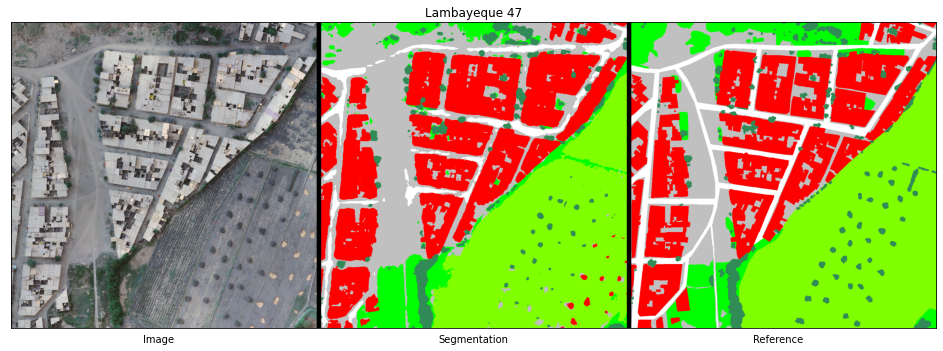

In [11]:
# plot and save image
evaluator.show_predicted_image(result, only_pred=False, save_img=False, save_dir=None)

### Predicting with FasterSeg model

In [12]:
# load FasterSeg model
model = fasterseg("models/FasterSeg/arch_1.pt", "models/FasterSeg/weights1.pt")

# check number of parameters and flops
flop, params = profile(model["model"], inputs=(torch.randn(1, 3, 1024, 1024),), verbose=False)
print("Params = %fMB, FLOP = %fGB" % (params / 1e6, flop / 1e9))

Params = 3.465192MB, FLOP = 15.425864GB


In [13]:
# init evaluator
evaluator = SegEvaluator(config, data=data, network=model)

# preform evaluation
result = evaluator.evaluate()
print(result)

[[1 1 1 ... 7 7 7]
 [1 1 1 ... 7 7 7]
 [1 1 1 ... 7 7 7]
 ...
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]]


In [14]:
# commute IoU
evaluator.compute_metric(result)

Class IoU Results
------------------------------
1 Bareland      	0.00%
2 Rangeland     	43.99%
3 Developed space	50.38%
4 Road          	56.48%
5 Tree          	46.69%
6 Water         	0.00%
7 Agriculture land	93.15%
8 Buildings     	85.00%
------------------------------
mean_IoU        	46.96%


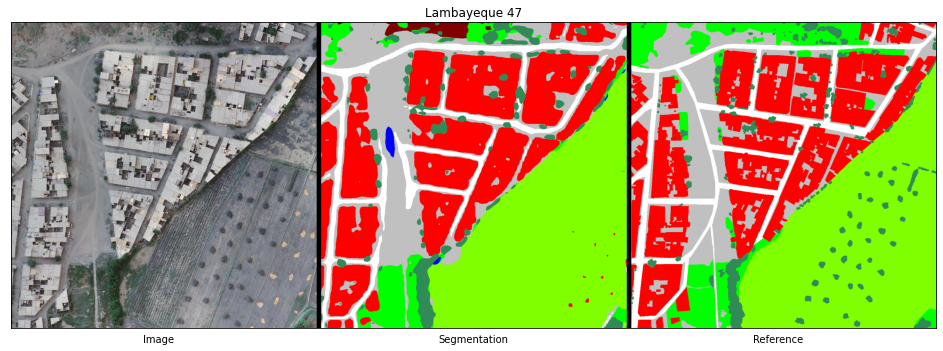

In [15]:
# plot and save image
evaluator.show_predicted_image(result, only_pred=False, save_img=False, save_dir=None)

In [ ]:
import os
from pathlib import Path

def get_samples(root):
        samples = []
        for entry in os.scandir(root):
            for subentry in os.scandir(entry.path):
                if subentry.is_dir():
                    samples.append(Path(subentry.path))
        return samples

In [ ]:
samples = get_samples("/home/cliffbb/PostDoc-Projects/datasets/seasonal_contrast_1m")

print(len(samples))